# PGS analysis in TCGA/GTEX

## Import packages

In [1]:
library(edgeR)
library(readr)
library(readxl)
library(data.table)
library(dplyr)
library(tidyr)

Loading required package: limma


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## GTEX

### Import metadata

In [3]:
sample_meta = read_excel('/mnt/grid/janowitz/rdata_norepl/gtex/counts/sampledata_gtex_SKclean.xlsx')
subject_meta = read_excel('/mnt/grid/janowitz/rdata_norepl/gtex/counts/subjectdata_gtex_SKclean.xlsx')

### Import PGS

In [4]:
pgs = read_table2('/grid/wsbs/home_norepl/skleeman/PGS/final/GTEX_UKB380_PGS_inner.sscore')
scale2 <- function(x, na.rm = TRUE) (x - mean(x, na.rm = na.rm)) / sd(x, na.rm)
pgs$score_scale = scale2(pgs$SCORE1_AVG)
m<-match(subject_meta$SUBJID, pgs$IID)
subject_meta$pgs_score = pgs$score_scale[m]
subject_meta

Warning message:
“`read_table2()` was deprecated in readr 2.0.0.
Please use `read_table()` instead.”

── Column specification ────────────────────────────────────────────────────────
cols(
  `#FID` = col_double(),
  IID = col_character(),
  NMISS_ALLELE_CT = col_double(),
  NAMED_ALLELE_DOSAGE_SUM = col_double(),
  SCORE1_AVG = col_double()
)




SUBJID,COHORT,SEX,AGE,RACE,HGHT,WGHT,BMI,INCEXC,ischaemic_time,hardy_scale,immediate_cause_death,notes,season_death,time_death,pgs_score
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
GTEX-1117F,Postmortem,2,66,2,66.0,199.00,32.12,TRUE,1212,4,Multisystem Organ Failure,#12: Sepsis #26: 1 Seizure 20 yrs ago- unknown reason #29: Wheel Chair Bound #58: Heart Failure,Spring,0.84722222,NA
GTEX-111CU,Organ Donor (OPO),1,57,3,70.0,234.00,33.57,TRUE,67,0,Head Trama,#12: WBC = 14.6,Spring,0.33402778,-0.24540140
GTEX-111FC,Postmortem,1,61,3,73.0,190.00,25.06,TRUE,1036,1,Anoxia,NA,Spring,0.52083333,-1.58463442
GTEX-111VG,Postmortem,1,63,3,69.0,200.00,29.53,TRUE,1002,3,Cardiac Arrest,Travel to Germany in the 1960's-1970's (unknown duration) for military. #12. Gangrenous wound on right BKA site.,Spring,0.30069444,-0.11664948
GTEX-111YS,Organ Donor (OPO),1,62,3,72.0,227.00,30.78,TRUE,101,0,CVA/Stroke,#12: WBC= 17.0,Spring,0.05625000,-0.02966220
GTEX-1122O,Organ Donor (OPO),2,64,3,66.0,203.00,32.76,TRUE,38,0,CVA,#12: WBC = 27.7 #58: Lupus (2011),Spring,0.98750000,-1.10615806
GTEX-1128S,Postmortem,2,66,3,66.0,160.00,25.82,TRUE,820,2,Anoxia,"#52: Living with someone-Hepatitis C (Husband diagnosed in 2005 with HCV, haven't had intercourse since diagnosis)",Spring,0.40625000,1.93885268
GTEX-113IC,Surgical,1,66,2,74.0,210.00,26.96,TRUE,94,NA,NA,#12: Wet gangrene on foot/leg #24: perscribed Prednisone.,NA,NA,NA
GTEX-113JC,Postmortem,2,53,3,66.9,178.20,27.99,TRUE,627,2,CVA,"#12: WBC = 12.4 #27: Fatigue (Thought had ""food poisoning"" onset for heart attack)",Spring,0.79097222,NA


### Import counts

In [5]:
dt = fread("/mnt/grid/janowitz/rdata_norepl/gtex/counts/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct.gz")
genes = data.frame(ensembl_id = dt$Name, gene_name = dt$Description)


library("GenomicFeatures")
gtf_txdb <- makeTxDbFromGFF("/mnt/grid/janowitz/home/references/human_rna/gencode.v26.annotation.gtf.gz")
exons_list_per_gene <- exonsBy(gtf_txdb,by="gene")
widths <- width(reduce(exons_list_per_gene))
totalexonlength <- vapply(widths, sum, numeric(1))
m<-match(gsub("\\..*","",genes$ensembl_id), gsub("\\..*","",names(totalexonlength)))
genes$length = totalexonlength[m]

y <- DGEList(counts=as.matrix(dt[,-c(1:2)]),genes=genes)

keep <- rowSums(cpm(y)>1) >= 15 #Arbritary, need expression in at least 15 samples
y <- y[keep, , keep.lib.sizes=FALSE]

y <- calcNormFactors(y)

In [ ]:
logcpm <- cpm(y, log=TRUE)

#Lets use TPM

#RPKM <- rpkm(y)
#logcpm <- t( t(RPKM) / colSums(RPKM, na.rm=TRUE) ) * 1e6
#logcpm <- log2(logcpm+0.1)

row.names(logcpm)<-y$genes$gene_name
logcpm <- subset(logcpm, row.names(logcpm)=="CST3" | row.names(logcpm)=="FKBP5" | row.names(logcpm)=="SERPINA6" | row.names(logcpm)=="SERPINA1")
logcpm<-as.data.frame(t(logcpm))
logcpm$SAMPID = row.names(logcpm)
logcpm<-inner_join(logcpm, sample_meta, by="SAMPID")
logcpm$SUBJID = sub('^([^-]+-[^-]+).*', '\\1', logcpm$SAMPID)
logcpm<-left_join(logcpm, subject_meta, by="SUBJID")
logcpm

In [6]:
correl = logcpm %>% drop_na(pgs_score) %>%
    group_by(sample_type) %>% 
    dplyr::summarize(cor = cor(pgs_score, CST3, method='spearman'), p=cor.test(pgs_score, CST3,method='spearman')$p.value,
                    n=n()) %>% filter(n>150) %>% arrange(desc(cor))

Warning message in cor.test.default(pgs_score, CST3, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(pgs_score, CST3, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(pgs_score, CST3, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(pgs_score, CST3, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(pgs_score, CST3, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(pgs_score, CST3, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(pgs_score, CST3, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(pgs_score, CST3, method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(pgs_score, CST3, method = "spearman"

In [7]:
correl

sample_type,cor,p,n
<chr>,<dbl>,<dbl>,<int>
Spleen,0.184150527,0.01601366,171
Prostate,0.127341545,0.09120076,177
Pancreas,0.090583188,0.16622713,235
Blood,0.058178760,0.13903790,648
Esophagus,0.027104589,0.38278025,1039
Pituitary,0.020325799,0.76786706,213
Colon,0.013592856,0.75220152,542
Blood Vessel,0.013156073,0.68706721,940
Nerve,0.012914256,0.79081241,424


Warning message:
“Removed 19 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 19 rows containing missing values (geom_text_repel).”


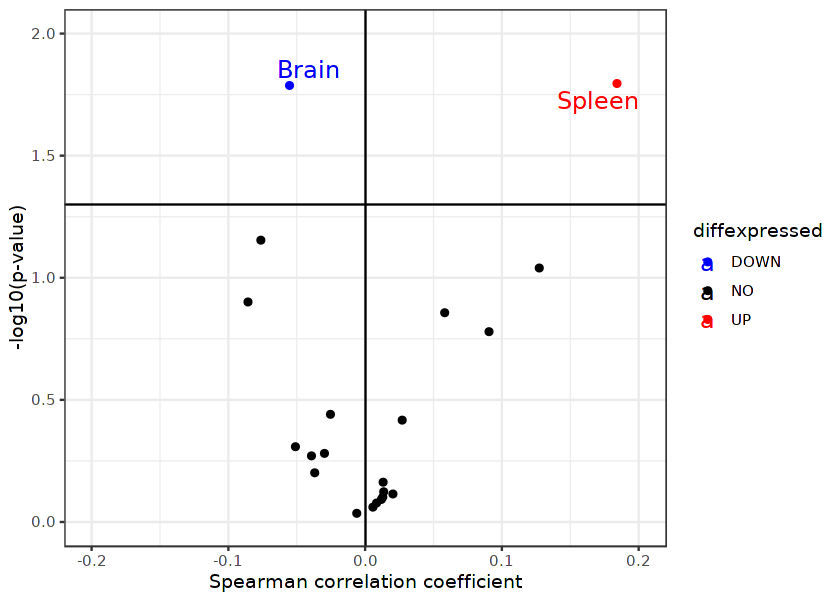

In [12]:
library(ggplot2)
options(repr.plot.width=7, repr.plot.height=5)


de = correl
# add a column of NAs
de$diffexpressed <- "NO"
# if log2Foldchange > 0.6 and pvalue < 0.05, set as "UP" 
de$diffexpressed[de$cor > 0 & de$p < 0.05] <- "UP"
# if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
de$diffexpressed[de$cor < 0 & de$p < 0.05] <- "DOWN"

de$delabel <- NA
de$delabel[de$diffexpressed != "NO"] <- de$sample_type[de$diffexpressed != "NO"]


library(ggrepel)
# plot adding up all layers we have seen so far
ggplot(data=de, aes(x=cor, y=-log10(p), col=diffexpressed, label=delabel)) +
        geom_point() + 
        theme_bw() +
        geom_text_repel(size=5) +
        scale_color_manual(values=c("blue", "black", "red"))+xlim(-0.2,0.2)+ylim(0,2)+xlab("Spearman correlation coefficient")+ylab("-log10(p-value)") +
        geom_hline(yintercept=-log10(0.05))+geom_vline(xintercept=0)

ggsave('/mnt/grid/janowitz/home/skleeman/cystatinc/figure_prep/figure3a.pdf', width=7, height=5)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”


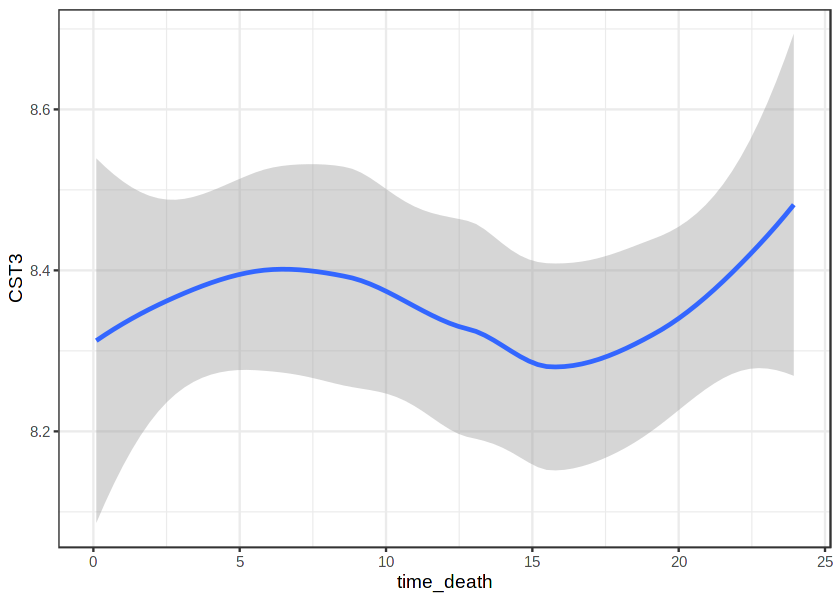

In [155]:
library(ggplot2)
time = subset(logcpm, uberon_string=="spleen")
#time = logcpm
#time$time_death[time$time_death > 0.987] = 0
time$time_death = time$time_death * 24
ggplot(time, aes(x=time_death,y=CST3)) + geom_smooth()+theme_bw()+xlim(0,24)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”


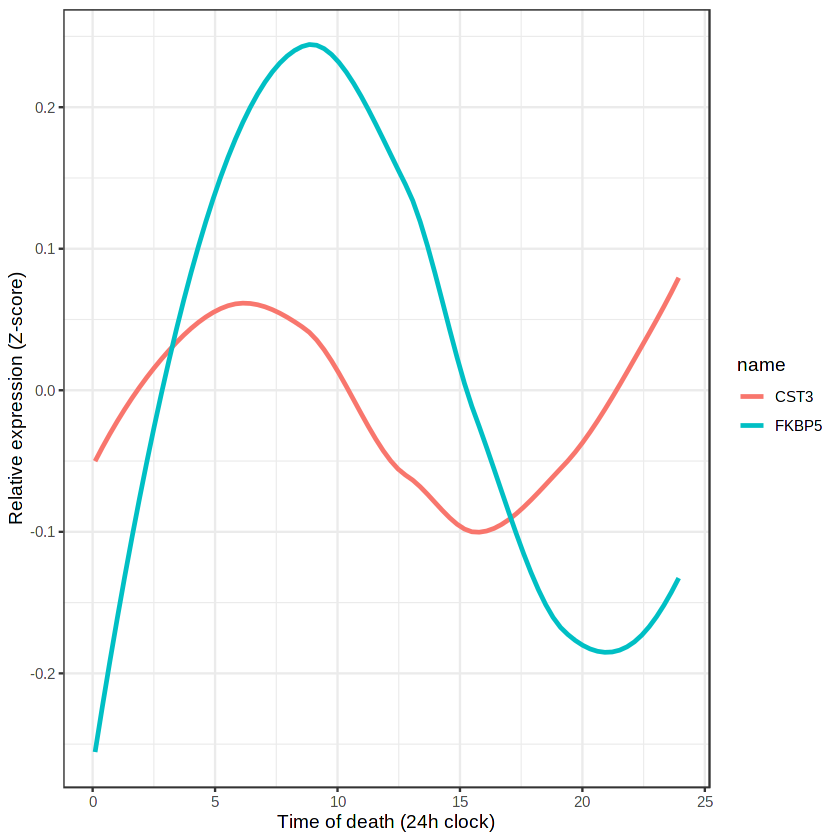

In [8]:
library(tidyr)
library(ggplot2)
logcpm2 = subset(logcpm, uberon_string=="spleen")

center_scale <- function(x) {
    scale(x, scale = FALSE)
}

logcpm2$FKBP5 = center_scale(logcpm2$FKBP5)
logcpm2$CST3 = center_scale(logcpm2$CST3)
use = logcpm2 %>% pivot_longer(cols = c('FKBP5','CST3'))
timex = use
#time = logcpm
timex$time_death = timex$time_death * 24
ggplot(timex, aes(x=time_death,y=value, color=name)) + geom_smooth(se=F)+theme_bw()+xlim(0,24)+xlab("Time of death (24h clock)")+ylab("Relative expression (Z-score)")

In [9]:
library(cosinor)
cst3 = subset(use, name=="FKBP5")
cst3 = cst3 %>% rowwise() %>% mutate(time_posix=as.POSIXct(as.Date("2011-02-01 00:00", tzone="UTC"))+3600*5 + 3600*24*time_death)
cst3$hour_of_sampling = format(cst3$time_posix,format = "%H")
cst3 = subset(cst3, is.na(hour_of_sampling)==FALSE)
cst3$hour_of_sampling = as.numeric(cst3$hour_of_sampling)
cst3$hour2 = cst3$time_death*24
cst3 = as.data.frame(cst3)
fit <- cosinor.lm(value ~ time(hour2), data = cst3, period = 24)

cst3 = subset(use, name=="CST3")
cst3 = cst3 %>% rowwise() %>% mutate(time_posix=as.POSIXct(as.Date("2011-02-01 00:00", tzone="UTC"))+3600*5 + 3600*24*time_death)
cst3$hour_of_sampling = format(cst3$time_posix,format = "%H")
cst3 = subset(cst3, is.na(hour_of_sampling)==FALSE)
cst3$hour_of_sampling = as.numeric(cst3$hour_of_sampling)
cst3$hour2 = cst3$time_death*24
cst3 = as.data.frame(cst3)
fit2 <- cosinor.lm(value ~ time(hour2), data = cst3, period = 24)


In [21]:
summary(fit2)

Raw model coefficients:
            estimate standard.error lower.CI upper.CI p.value
(Intercept)  -0.0081         0.0392  -0.0850   0.0687  0.8357
rrr           0.0347         0.0537  -0.0706   0.1399  0.5184
sss           0.0492         0.0569  -0.0624   0.1607  0.3874

***********************

Transformed coefficients:
            estimate standard.error lower.CI upper.CI p.value
(Intercept)  -0.0081         0.0392  -0.0850   0.0687  0.8357
amp           0.0602         0.0548  -0.0472   0.1676  0.2722
acr           0.9567         0.9279  -0.8620   2.7755  0.3025

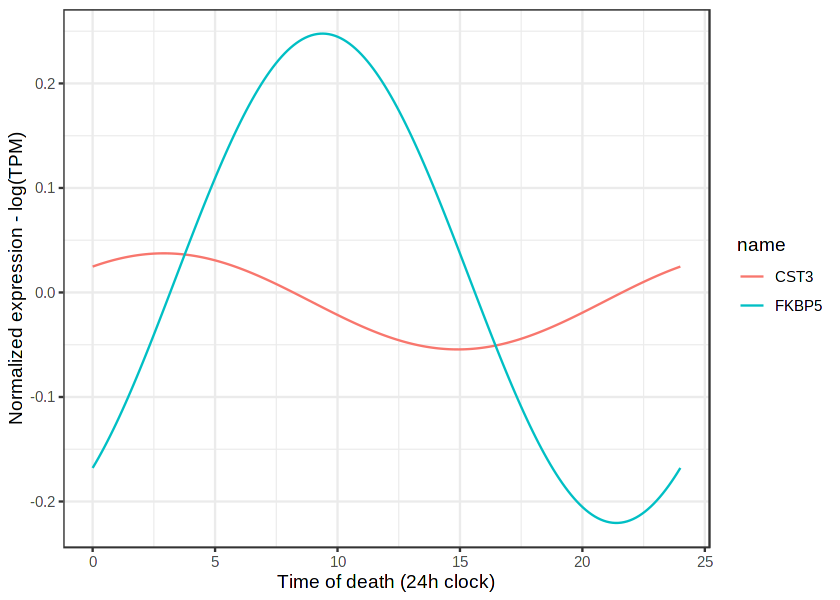

In [171]:
object=fit
timeax <- seq(0, object$period, length.out = 200)
covars <- grep("(rrr|sss)", attr(object$fit$terms, "term.labels"), invert = TRUE, value = TRUE)

newdata <- data.frame(time = timeax, rrr = cos(2 * pi * timeax / object$period),
                    sss = sin(2 * pi * timeax / object$period))

newdata$Y.hat <- predict(object$fit, newdata = newdata)


object=fit2
timeax <- seq(0, object$period, length.out = 200)
covars <- grep("(rrr|sss)", attr(object$fit$terms, "term.labels"), invert = TRUE, value = TRUE)

newdata2 <- data.frame(time = timeax, rrr = cos(2 * pi * timeax / object$period),
                    sss = sin(2 * pi * timeax / object$period))

newdata2$Y.hat <- predict(object$fit, newdata = newdata2)

names(newdata)[4]="FKBP5"
newdata$CST3 = newdata2$Y.hat

newdata = newdata %>% pivot_longer(cols = c('FKBP5','CST3'))


ggplot(newdata, aes_string(x = "time", y = "value", color = "name")) + geom_line()+theme_bw()+xlim(0,24)+xlab("Time of death (24h clock)")+ylab("Normalized expression - log(TPM)")

## TCGA

In [72]:
tcga_count = fread('/mnt/grid/janowitz/rdata_norepl/tcga_germline/rna/tcga_gene_expected_count.gz')
tcga_genes = fread('/mnt/grid/janowitz/rdata_norepl/tcga_germline/rna/gencode.v23.annotation.gene.probemap')
tcga_samples = fread('/mnt/grid/janowitz/rdata_norepl/tcga_germline/rna/TCGA_phenotype_denseDataOnlyDownload.tsv.gz')
tcga_immune = read_excel('/mnt/grid/janowitz/rdata_norepl/tcga_germline/rna/tcga_immunity.xlsx')
tcga_clinical = read_excel('/mnt/grid/janowitz/rdata_norepl/tcga_germline/rna/TCGA-CDR.xlsx')
tcga_prs = read_table2('/grid/wsbs/home_norepl/skleeman/PGS/final/TCGA_UKB380_PGS_inner.sscore')
scale2 <- function(x, na.rm = TRUE) (x - mean(x, na.rm = na.rm)) / sd(x, na.rm)
tcga_prs$score_scale = scale2(tcga_prs$SCORE1_AVG)
names(tcga_prs)[2]="subjid"
tcga_prs$subjid = gsub('\\.', '-', tcga_prs$subjid )
pcs = fread('/mnt/grid/janowitz/rdata_norepl/tcga_germline/plink/tcga_eur_pcs.tsv')
pcs$IID = gsub('\\.', '-', pcs$IID )
names(pcs)[1]="subjid"
names(tcga_clinical)[1] = "subjid"

New names:
* Eosinophils -> Eosinophils...41
* Neutrophils -> Neutrophils...48
* Neutrophils -> Neutrophils...60
* Eosinophils -> Eosinophils...61

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in X1902 / R1902C24: got 'R0'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in X1903 / R1903C24: got 'R0'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in X1904 / R1904C24: got 'R0'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in X1905 / R1905C24: got 'R0'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in X1906 / R1906C24: got 'R0'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Expecting logical in X1907 / R1907C24: got 'R0'”
Warning message in read_fun(pa

### PRS vs survival

In [95]:
prs_survival<-inner_join(tcga_prs, tcga_clinical, by='subjid')
prs_survival<-inner_join(prs_survival, pcs, by='subjid')

In [8]:
names(prs_survival)

[1] "#FID"                                "subjid"                             
 [3] "NMISS_ALLELE_CT"                     "NAMED_ALLELE_DOSAGE_SUM"            
 [5] "SCORE1_AVG"                          "score_scale"                        
 [7] "type"                                "age_at_initial_pathologic_diagnosis"
 [9] "gender"                              "race"                               
[11] "ajcc_pathologic_tumor_stage"         "clinical_stage"                     
[13] "histological_type"                   "histological_grade"                 
[15] "initial_pathologic_dx_year"          "menopause_status"                   
[17] "birth_days_to"                       "vital_status"                       
[19] "tumor_status"                        "last_contact_days_to"               
[21] "death_days_to"                       "cause_of_death"                     
[23] "new_tumor_event_type"                "new_tumor_event_site"               
[25] "new_tumor_event_site_other"          "new_tumor_event_dx_days_to"         
[27] "treatment_outcome_first_course"      "margin_status"                      
[29] "residual_tumor"                      "OS"                                 
[31] "OS.time"                             "DSS"                                
[33] "DSS.time"                            "DFI"                                
[35] "DFI.time"                            "PFI"                                
[37] "PFI.time"                            "PC1"                                
[39] "PC2"                                 "PC3"                                
[41] "PC4"

In [50]:
nrow(prs_survival)

[1] 4368

In [46]:
library(survival)
library(survminer)

framex = data.frame()

prs_survival$type[prs_survival$type=="READ"] = "COAD"

prs_survival = subset(prs_survival, tumor_status =="TUMOR FREE" | tumor_status == "WITH TUMOR")

prs_survival = subset(prs_survival, type %in% c("BLCA","BRCA", "COAD","READ","UCEC","ESCA","STAD","HNSC","KIRC","KIRP",
                                               "LIHC","LUSC","LUAD",'SKCM','OV','PAAD'))

for(i in 1:length(unique(prs_survival$type))) {
    tryCatch({
        cancer = unique(prs_survival$type)[i]
        use = subset(prs_survival, type==cancer)
        if(length(unique(use$gender)) ==2 ) {
            res.cox = coxph(Surv(DSS.time, DSS) ~ score_scale + age_at_initial_pathologic_diagnosis + gender + PC1 + PC2 + PC3 + PC4 + tumor_status, data=use)
        } else {
            res.cox = coxph(Surv(DSS.time, DSS) ~ score_scale + age_at_initial_pathologic_diagnosis + PC1 + PC2 + PC3 + PC4 + tumor_status, data=use)
        }
        test = summary(res.cox)
        p_value = as.numeric(test$coefficients[1,5])
        add = data.frame(name=cancer, p_value = p_value, hr=test$coefficients[1,2], se=test$coefficients[1,3],lower = test$conf.int[1,3],
                     upper = test$conf.int[1,4])
        test = summary(res.cox)
        framex=rbind(framex,add)
    }, error=function(e){})
}


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  8 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  8 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  8 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  8 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  8 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  8 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, c

In [30]:
framex %>% arrange(hr)

name,p_value,hr,se,lower,upper
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PRAD,0.201515008,0.2846690,0.98370009,0.04140122,1.957344
UCEC,0.258565785,0.7255700,0.28394519,0.41589600,1.265826
KIRP,0.548057581,0.7938683,0.38429821,0.37379478,1.686024
BLCA,0.310611045,0.8685889,0.13894831,0.66151738,1.140479
OV,0.182954475,0.8967029,0.08187248,0.76376298,1.052782
CESC,0.832311779,0.9323997,0.33056831,0.48777760,1.782306
BRCA,0.946606352,0.9908713,0.13693783,0.75762721,1.295922
COAD,0.995502849,0.9990797,0.16336073,0.72534933,1.376110
ESCA,0.798273038,1.0465856,0.17815374,0.73812515,1.483951


In [49]:
library(meta)
meta = metagen(log(framex$hr), framex$se, sm = "HR", studlab=framex$name)

pdf(file = "/mnt/grid/janowitz/home/skleeman/cystatinc/figure_prep/figure4cy.pdf", width = 8, height = 6)



forest.meta(meta,leftlabs = c("Cancer code"), leftcols = c("studlab"),rightcols=c("effect", "ci"),sortvar = TE)

dev.off()

png 
  2

Warning message:
“geom_hline(): Ignoring `mapping` because `yintercept` was provided.”


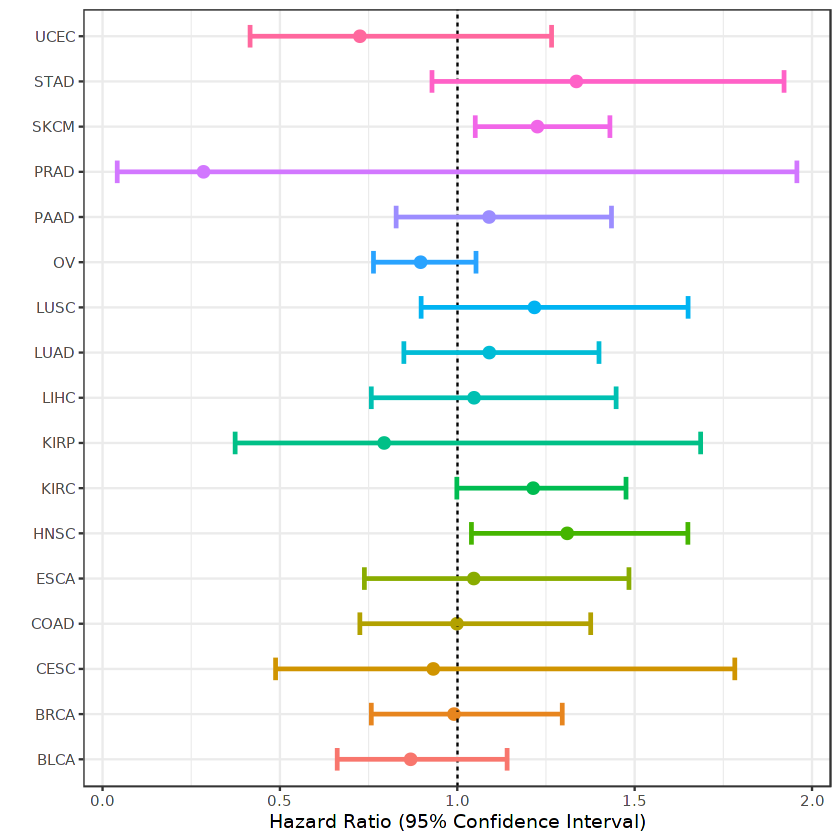

In [22]:
framex  %>% ggplot(
  aes(x = name,y = hr, ymin = lower, ymax = upper))+
  geom_pointrange(aes(col=name))+
  geom_hline(aes(fill=name),yintercept =1, linetype=2)+
  xlab('Group')+ ylab("Hazard Ratio (95% Confidence Interval)")+
  geom_errorbar(aes(ymin=lower, ymax=upper,col=name),width=0.5,cex=1)+ 
  theme(plot.title=element_text(size=16,face="bold"),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.text.x=element_text(face="bold"),
        axis.title=element_text(size=12,face="bold"),
        strip.text.y = element_text(hjust=0,vjust = 1,angle=180,face="bold"))+
  coord_flip()+theme_bw()+xlab("")+ theme(legend.position = "none") 